## Reading and Plotting Stock Information

In [18]:
# Import modules
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

In [15]:
# Import APPL stock data
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2017, 1, 1)
dframe = web.DataReader('AAPL', 'google', start, end)
dframe.to_csv("data/AAPL.csv", index_label="Date")

In [17]:
# Read data from CSV and print first 5 rows
df = pd.read_csv("data/AAPL.csv")
print(df.head())

         Date   Open   High    Low  Close     Volume
0  2010-01-04  30.49  30.64  30.34  30.57  123432050
1  2010-01-05  30.66  30.80  30.46  30.63  150476004
2  2010-01-06  30.63  30.75  30.11  30.14  138039594
3  2010-01-07  30.25  30.29  29.86  30.08  119282324
4  2010-01-08  30.04  30.29  29.87  30.28  111969081


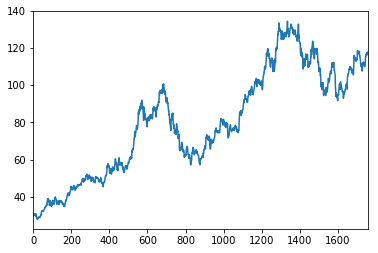

In [19]:
#Plot High price
df['High'].plot()
plt.show()

## Joining two stock Information

In [20]:
# Specify date range using pandas range
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)

# Create empty dataFrame
df1 = pd.DataFrame(index=dates)

In [21]:
# Join two dataframe
df1 = df1.join(df)
print(df1)

                    Date  Open  High  Low  Close  Volume
2010-01-22 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-23 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-24 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-25 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN
2010-01-26 00:00:00  NaN   NaN   NaN  NaN    NaN     NaN


In [22]:
# Above shows all NaN as AAPL stock data is read without date as index.
# We can read again with correct format
df = pd.read_csv("data/AAPL.csv", index_col="Date", parse_dates=True)
print(df.head())

             Open   High    Low  Close     Volume
Date                                             
2010-01-04  30.49  30.64  30.34  30.57  123432050
2010-01-05  30.66  30.80  30.46  30.63  150476004
2010-01-06  30.63  30.75  30.11  30.14  138039594
2010-01-07  30.25  30.29  29.86  30.08  119282324
2010-01-08  30.04  30.29  29.87  30.28  111969081


In [27]:
# Now join again and print out
df1 = None
df1 = pd.DataFrame(index=dates)
df1 = df1.join(df)
print(df1)

             Open   High    Low  Close       Volume
2010-01-22  29.54  29.64  28.17  28.25  220441872.0
2010-01-23    NaN    NaN    NaN    NaN          NaN
2010-01-24    NaN    NaN    NaN    NaN          NaN
2010-01-25  28.93  29.24  28.60  29.01  266424802.0
2010-01-26  29.42  30.53  28.94  29.42  466777486.0


In [28]:
# Let's remove row with has NaN
df1 = df1.dropna()
print(df1)

             Open   High    Low  Close       Volume
2010-01-22  29.54  29.64  28.17  28.25  220441872.0
2010-01-25  28.93  29.24  28.60  29.01  266424802.0
2010-01-26  29.42  30.53  28.94  29.42  466777486.0


In [ ]:
# Note that above two operation can be done by following command
# df1 = df1.join(df, how='inner')

### Example: Create Stock information using Close

In [29]:
# First, let's download stock information
tickers = ['AAPL', 'SPY', 'IBM', 'GOOG', 'GLD']
for ticker in tickers:
    df = web.DataReader(ticker, 'google', start, end)
    df.to_csv("data/{}.csv".format(ticker), index_label="Date")

In [30]:
# Create dataframe with wanted date range
df1 = None
df1 = pd.DataFrame(index=dates)

In [32]:
# Join all stock information
for ticker in tickers:
    df_temp = pd.read_csv("data/{}.csv".format(ticker), index_col='Date',
                         parse_dates=True, usecols=['Date', 'Close'],
                         na_values=['nan'])
    # Rename
    df_temp = df_temp.rename(columns={'Close': ticker})
    df1 = df1.join(df_temp)
print(df1)

             AAPL     SPY     IBM    GOOG     GLD
2010-01-22  28.25  109.21  125.50  274.73  107.17
2010-01-23    NaN     NaN     NaN     NaN     NaN
2010-01-24    NaN     NaN     NaN     NaN     NaN
2010-01-25  29.01  109.77  126.12  269.73  107.48
2010-01-26  29.42  109.31  125.75  270.94  107.56
